# Data reading clean

In [7]:
import json
import os
current_working_directory = os.getcwd()
current_data_directory = current_working_directory +"\data"
print(current_working_directory)

c:\Users\Michał\Diploma-Project-Sentiment-analysis-based-on-products-reviews\Diploma-Project-Sentiment-analysis-based-on-products-reviews


In [8]:
import requests
import gzip
from io import BytesIO
 
def load_and_save_category(category):
 
    basic_url = "https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/"
   
    # Nadanie nazw plikom
    extracted_filename = category + ".jsonl"
    jsonl_file_path = os.path.join(current_data_directory, extracted_filename)
 
    url = basic_url +extracted_filename+ ".gz"
    # Pobranie pliku z URL i zapisanie go lokalnie
    response = requests.get(url)
    response.raise_for_status()  # Sprawdź, czy nie wystąpiły błędy podczas pobierania
   
    with gzip.open(BytesIO(response.content), "rt", encoding="utf-8") as gz_file:
        with open(jsonl_file_path, "w", encoding="utf-8") as jsonl_file:
            jsonl_file.write(gz_file.read())
 
    print(f"Plik rozpakowany i zapisany jako {extracted_filename}")
 

In [9]:
load_and_save_category("Subscription_Boxes")

Plik rozpakowany i zapisany jako Subscription_Boxes.jsonl


In [2]:
def create_jsonl_variables(directory):
    jsonl_files = [f for f in os.listdir(directory) if f.endswith('.jsonl') and not f.startswith('meta')]
    
    jsonl_paths = {}
    
    for file_name in jsonl_files:
        var_name = file_name.replace('.jsonl', '').replace(' ', '_').replace('-', '_')
        file_path = os.path.join(directory, file_name)
        jsonl_paths[var_name + '_jsonl'] = file_path
    
    return jsonl_paths

In [3]:
def create_jsonl_variables_meta(directory):
    jsonl_files = [f for f in os.listdir(directory) if f.endswith('.jsonl') and f.startswith('meta')]
    
    jsonl_paths = {}
    
    for file_name in jsonl_files:
        var_name = file_name.replace('.jsonl', '').replace(' ', '_').replace('-', '_')
        file_path = os.path.join(directory, file_name)
        jsonl_paths[var_name + '_jsonl'] = file_path
    
    return jsonl_paths

In [4]:
def count_records_single(jsonl_file):
    record_count = 0
    with open(jsonl_file, 'r', encoding='utf-8') as file:
        for line in file:
            record_count += 1
    print(f'Records count: {record_count}\n')
    return record_count

In [5]:
def count_records(jsonl_files):
    record_count_dict = {}
    
    for var_name, jsonl_file in jsonl_files.items():
        record_count = 0
        with open(jsonl_file, 'r', encoding='utf-8') as file:
            for line in file:
                record_count += 1
        record_count_dict[var_name] = record_count
        print(f'{var_name}: Records count: {record_count}\n')
    
    return record_count_dict

In [6]:
import pandas as pd

def jsonl_to_dataframe(jsonl_file, n=None):
    data = []
    with open(jsonl_file, 'r', encoding='utf-8') as file:
        for i, line in enumerate(file):
            if n is not None and i >= n:
                break
            obj = json.loads(line)
            data.append(obj)
    df = pd.DataFrame(data)
    return df

C:\Users\User\AppData\Local\Temp\ipykernel_17948\377148348.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [7]:
def create_merged_df(df, meta_df):
    df_merged = df.merge(meta_df, on='parent_asin', how='left')
    column_order = ['parent_asin','title_y','title_x','text','rating','images_x', 'asin', 
        'user_id', 'timestamp', 'helpful_vote', 'verified_purchase',
        'main_category', 'average_rating', 'rating_number',
        'features', 'description', 'price', 'images_y', 'videos', 'store',
        'categories', 'details', 'bought_together']
    df_merged = df_merged[column_order]
    df_merged = df_merged.sort_values(by='parent_asin')
    return df_merged

In [8]:
def merge_all_files(jsonl_files, meta_jsonl_files, n=None):
    merged_dataframes = {}

    for key, file_path in jsonl_files.items():
        meta_key = f"meta_{key}_jsonl"
        if meta_key in meta_jsonl_files:
            df = jsonl_to_dataframe(file_path, n=n)
            meta_df = jsonl_to_dataframe(meta_jsonl_files[meta_key], n=n)
            
            merged_df = create_merged_df(df, meta_df)
            merged_dataframes[key] = merged_df
            
            print(f"Successfully merged {key} with {meta_key}")
    
    return merged_dataframes

In [9]:
def merge_all_files_to_globals(jsonl_files, meta_jsonl_files, n=None):
    merged_dfs = {}  
    
    for key, file_path in jsonl_files.items():
        meta_key = f"meta_{key}_jsonl"
        if meta_key in meta_jsonl_files:
            df = jsonl_to_dataframe(file_path, n=n)
            meta_df = jsonl_to_dataframe(meta_jsonl_files[meta_key], n=n)
            
            merged_df = create_merged_df(df, meta_df)
            
            globals()[f"merged_{key}"] = merged_df
            merged_dfs[f"merged_{key}"] = merged_df
            
            print(f"Global variable 'merged_{key}' created successfully.")
    
    return merged_dfs

In [10]:
def merge_all_files_to_globals(jsonl_files, meta_jsonl_files, n=None): 
    merged_dfs = {}  
    
    for key, file_path in jsonl_files.items():
        base_key = key.replace("_jsonl", "")
        meta_key = f"meta_{key}"  
        
        if meta_key in meta_jsonl_files:
            df = jsonl_to_dataframe(file_path, n=n)
            meta_df = jsonl_to_dataframe(meta_jsonl_files[meta_key], n=n)
            
            merged_df = create_merged_df(df, meta_df)
            
            globals()[f"merged_{base_key}"] = merged_df
            merged_dfs[f"merged_{base_key}"] = merged_df
            
            print(f"Global variable 'merged_{base_key}' created successfully.")
    
    return merged_dfs


In [11]:
def merge_all_files_to_globals(jsonl_files, meta_jsonl_files, n=None): 
    for key, file_path in jsonl_files.items():
        base_key = key.replace("_jsonl", "")
        meta_key = f"meta_{key}"  
        
        if meta_key in meta_jsonl_files:
            df = jsonl_to_dataframe(file_path, n=n)
            meta_df = jsonl_to_dataframe(meta_jsonl_files[meta_key], n=n)
            
            merged_df = create_merged_df(df, meta_df)
            
            globals()[f"merged_{base_key}"] = merged_df
            print(f"Global variable 'merged_{base_key}' created successfully.")


In [12]:
jsonl_variables = create_jsonl_variables('c:\\Users\\User\\Desktop\\INŻYNIERKA\\data\\amazon_data_small')
globals().update(jsonl_variables)

In [13]:
jsonl_variables_meta = create_jsonl_variables_meta('c:\\Users\\User\\Desktop\\INŻYNIERKA\\data\\amazon_data_small')
globals().update(jsonl_variables_meta)

In [14]:
merge_all_files_to_globals(jsonl_variables, jsonl_variables_meta)


Global variable 'merged_Video_Games' created successfully.


In [15]:
merged_Video_Games

,parent_asin,title_y,title_x,text,rating,images_x,asin,user_id,timestamp,helpful_vote,...,rating_number,features,description,price,images_y,videos,store,categories,details,bought_together
2042444,0007922582,The Sneetches and Other Stories,Too small with tiny print,No dimensions listed or photo showing scale. T...,2.0,[],0007922582,AHNJSGJFZS6XP76LKNDRYKXHDF4A,1522616028253,3,...,1,[New],[New],None,[{'thumb': 'https://m.media-amazon.com/images/...,[],Hackerdom,[],{'Pricing': 'The strikethrough price is the Li...,None
765330,0008288194,The Creativity Code,AI is Doing Nothing of the Kind--It's Not Crea...,It's a sad commentary on a book when the only ...,3.0,[],0008288194,AG3JLER74652RO6C2T3LWDD7Y3YQ,1642879240772,1,...,166,[‘Du Sautoy’s discussion of computer creativit...,[],13.53,[{'large': 'https://m.media-amazon.com/images/...,[],Marcus du Sautoy (Author),"[Video Games, PC, Games]","{'Publisher': 'Fourth Estate (March 12, 2020)'...",None
4347823,0028179714,The Autobiography of Miss Jane Pittman and Rel...,This is a great Book,I had this book read to me by my 4th grade soc...,5.0,[],0028179714,AEUZU4FNVFWYIDAMWQ7MYU3X2CQA,1394379746000,1,...,13,[1],[1],15.01,[{'thumb': 'https://m.media-amazon.com/images/...,[],Kiligry,[],{'Pricing': 'The strikethrough price is the Li...,None
493268,0028179714,The Autobiography of Miss Jane Pittman and Rel...,I love this edition because of the additional ...,I love this edition because of the additional ...,4.0,[],0028179714,AFN6AWE2JRC2Z4GS373A6HYOBO6Q,1441559744000,2,...,13,[1],[1],15.01,[{'thumb': 'https://m.media-amazon.com/images/...,[],Kiligry,[],{'Pricing': 'The strikethrough price is the Li...,None
4079743,0028179714,The Autobiography of Miss Jane Pittman and Rel...,very good condition,just for reading,5.0,[],0028179714,AFPK2ZX3TMQACR6CF7PYOPNLVNQQ,1614122287825,0,...,13,[1],[1],15.01,[{'thumb': 'https://m.media-amazon.com/images/...,[],Kiligry,[],{'Pricing': 'The strikethrough price is the Li...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994104,B0CKQHY5K4,Exploring Creation with Biology 3rd Edition St...,Looks great,This is the exact book my daughter needed. Loo...,5.0,[],1946506486,AEBKKYYJ4Q3HV3AEDX2KT7WGLATQ,1670784916641,0,...,1291,[Exploring Creation with Biology 3rd Edition S...,[],None,[{'thumb': 'https://m.media-amazon.com/images/...,[],FougeiTTs,"[Video Games, Legacy Systems, Commodore System...",{},None
4532230,B0CKQNJB3T,"Redragon Gaming Keyboard, 60% Mechanical Gamin...",Typing With it Right Now!,"Honestly, if you don't need function keys or t...",5.0,[{'small_image_url': 'https://m.media-amazon.c...,B0CCD7XBS8,AHJ7WQWVWFLBYQAW3X5UXTGXB3XQ,1693417356966,0,...,63,"[✅ Small Size, Full Function✅ -The K615 60 per...",[],30.79,[{'thumb': 'https://m.media-amazon.com/images/...,[],Redragon,"[Video Games, PC, Accessories, Gaming Keyboards]",{'Package Dimensions': '13.03 x 5.87 x 1.69 in...,None
4425489,B0CKQNJB3T,"Redragon Gaming Keyboard, 60% Mechanical Gamin...",great entry level low-profile keyboard,"since this is a low profile keyboard, the lear...",5.0,[{'small_image_url': 'https://m.media-amazon.c...,B0CCD7XBS8,AFFJVUB6QKUQYB4KDRLLRQQIHHAQ,1692749033031,0,...,63,"[✅ Small Size, Full Function✅ -The K615 60 per...",[],30.79,[{'thumb': 'https://m.media-amazon.com/images/...,[],Redragon,"[Video Games, PC, Accessories, Gaming Keyboards]",{'Package Dimensions': '13.03 x 5.87 x 1.69 in...,None
4455871,B0CKQNJB3T,"Redragon Gaming Keyboard, 60% Mechanical Gamin...",amazing value keyboard with a solid construction,"Well, The value that this provides under 30 do...",5.0,[],B0CCD7XBS8,AGLZ3JZG3OKSKBAITWELGR7ELQ3A,1692195766351,0,...,63,"[✅ Small Size, Full Function✅ -The K615 60 per...",[],30.79,[{'thumb': 'https://m.media-amazon.com/images/...,[],Redragon,"[Video Games, PC, Accessories, Gaming Keyboards]",{'Package Dimensions': '13.03 x 5.87 x 1.69 in...,None


# Data exploration

In [16]:
def count_records_single(jsonl_file):
    record_count = 0
    with open(jsonl_file, 'r', encoding='utf-8') as file:
        for line in file:
            record_count += 1
    print(f'Records count: {record_count}\n')
    return record_count

In [17]:
def count_nulls_or_empty_strings_in_each_col(jsonl_file, record_count):
    from collections import defaultdict

    null_counts = defaultdict(int)

    with open(jsonl_file, 'r', encoding='utf-8') as file:
        for line in file:
            record = json.loads(line)

            for key, value in record.items():
                if value is None or value=='':
                    null_counts[key] +=1

    print('Number of null or empty values in columns:')
    for column, count in null_counts.items():
        print(f'{column}: {count}')
        print(f'Precent of {column} nulls or empty values in all: {(count/record_count)*100}%')

In [18]:
def text_column_length_info(jsonl_file):
    string_lengths = []
    with open(jsonl_file, 'r', encoding='utf-8') as file:
        for line in file:
            record = json.loads(line)

            for key,value in record.items():
                if key=='text' and isinstance(value, str) and value.strip():
                    string_lengths.append(len(value))

    min_length = min(string_lengths)
    max_length = max(string_lengths)
    avg_length = sum(string_lengths) / len(string_lengths)

    print(f'Minimum string length: {min_length}')
    print(f'Maximum string length: {max_length}')
    print(f'Average string length: {avg_length:.2f}\n')

In [19]:
def stats_on_json_files(jsonl_file):
    #show_n_first_lines_and_column_names(jsonl_file)
    record_count = count_records_single(jsonl_file)
    count_nulls_or_empty_strings_in_each_col(jsonl_file, record_count)
    text_column_length_info(jsonl_file)

In [23]:
for var_name, value in globals().items():
    if var_name.endswith('jsonl'):
        print(f"Variable Name: {var_name}")

Variable Name: Video_Games_jsonl
Variable Name: meta_Video_Games_jsonl


In [46]:
stats_on_json_files(Video_Games_jsonl)

Records count: 4624615

Number of null or empty values in columns:
text: 323
Precent of text nulls or empty values in all: 0.006984365184993778%
Minimum string length: 1
Maximum string length: 36893
Average string length: 307.83



In [20]:
def reviews_per_product_stats(df):
    parent_asin_counts = df['parent_asin'].value_counts()

    min_repeats = parent_asin_counts.min()
    max_repeats = parent_asin_counts.max()
    average_repeats = parent_asin_counts.mean()

    print(f"Smallest number of reviews per product: {min_repeats}")
    print(f"Largest number of reviews per product: {max_repeats}")
    print(f"Average number of reviews per product: {average_repeats}\n")

In [21]:
def n_of_reviews_per_product_over_value(df, value = 100):
    parent_asin_counts = df['parent_asin'].value_counts()
    repeated_over_value = parent_asin_counts[parent_asin_counts > value]
    count_repeated_over_value = repeated_over_value.count()

    print(f"Number of products, which number of reviews is > {value}: {count_repeated_over_value}\n")

In [22]:
comment_counts = merged_Video_Games['parent_asin'].value_counts()

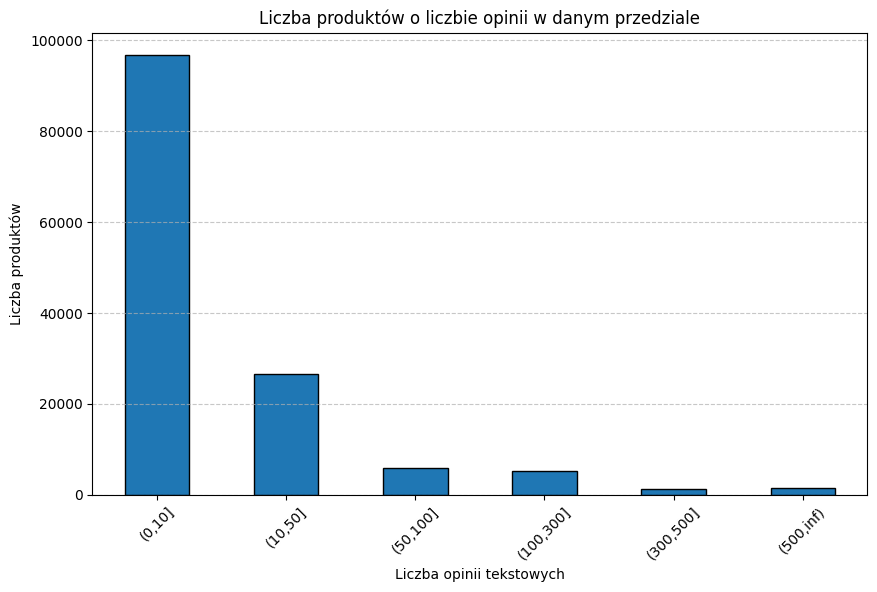

In [23]:
import matplotlib.pyplot as plt
bins = [0, 10, 50, 100, 300, 500, float('inf')]
labels = ['(0,10]', '(10,50]', '(50,100]', '(100,300]', '(300,500]', '(500,inf)']

comment_counts_binned = pd.cut(comment_counts, bins=bins, labels=labels, right=True)

binned_counts = comment_counts_binned.value_counts().sort_index()

plt.figure(figsize=(10, 6))
binned_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Liczba opinii tekstowych')
plt.ylabel('Liczba produktów')
plt.title('Liczba produktów o liczbie opinii w danym przedziale')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

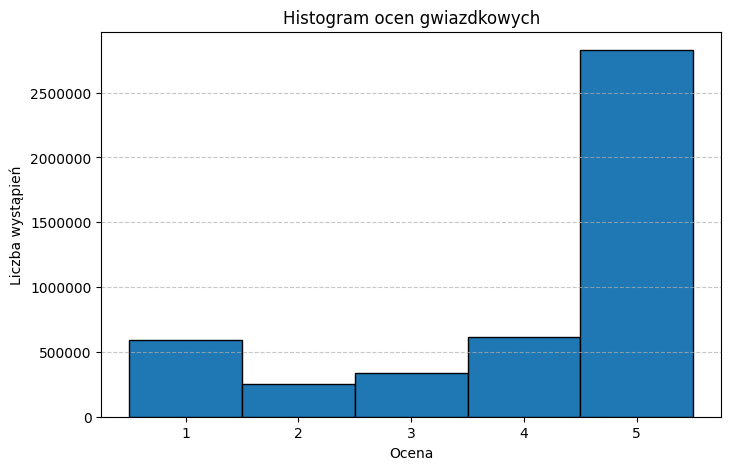

In [37]:
plt.figure(figsize=(8, 5))
plt.hist(merged_Video_Games['rating'], bins=range(1, 7), edgecolor='black', align='left')
plt.xlabel('Ocena')
plt.ylabel('Liczba wystąpień')
plt.title('Histogram ocen gwiazdkowych')
plt.xticks(range(1, 6)) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.ticklabel_format(axis='y', style='plain')

plt.show()

In [24]:
def stats_on_data_frames(df_merged):
    reviews_per_product_stats(df_merged)
    #n_of_reviews_per_product_over_value(df_merged, value = 10)
    #n_of_reviews_per_product_over_value(df_merged, value = 50)
    #n_of_reviews_per_product_over_value(df_merged, value = 100)

In [39]:
stats_on_data_frames(merged_Video_Games)

Smallest number of reviews per product: 1
Largest number of reviews per product: 18105
Average number of reviews per product: 33.695072459544335



#### Weird: main category != kategoria ze strony

In [26]:
df_Video_Games_review = jsonl_to_dataframe(Video_Games_jsonl)

In [27]:
df_Video_Games_meta = jsonl_to_dataframe(meta_Video_Games_jsonl)

In [28]:
import pandas as pd

unique_values_main_category = df_Video_Games_meta['main_category'].unique().tolist()

print(f"Unique values in 'main category': {unique_values_main_category}")

Unique values in 'main category': ['Video Games', 'Computers', 'Cell Phones & Accessories', 'Sports & Outdoors', 'All Electronics', 'Software', 'Toys & Games', 'Amazon Home', 'Home Audio & Theater', 'Tools & Home Improvement', 'Office Products', 'Camera & Photo', 'Industrial & Scientific', 'Movies & TV', None, 'Grocery', 'Automotive', 'Books', 'AMAZON FASHION', 'Arts, Crafts & Sewing', 'Buy a Kindle', 'Musical Instruments', 'Portable Audio & Accessories', 'Health & Personal Care', 'All Beauty', 'Digital Music', 'Amazon Devices', 'Audible Audiobooks', 'Pet Supplies', 'Baby', 'GPS & Navigation', 'Appliances', 'Gift Cards', 'Car Electronics', 'Collectible Coins', 'Handmade', '']


In [29]:
counts_main_category = df_Video_Games_meta['main_category'].value_counts()

print("Counts of each unique value in 'main category':")
print(counts_main_category)

Counts of each unique value in 'main category':
main_category
Video Games                     81255
Computers                       17235
All Electronics                 14816
Cell Phones & Accessories        3884
Toys & Games                     2733
Software                         1511
Industrial & Scientific          1079
Amazon Home                       737
Home Audio & Theater              443
Tools & Home Improvement          369
Office Products                   295
Sports & Outdoors                 244
Buy a Kindle                      220
Movies & TV                       197
Books                             196
Musical Instruments               154
All Beauty                        126
Camera & Photo                    117
Portable Audio & Accessories      112
Digital Music                     104
Health & Personal Care             95
Automotive                         85
AMAZON FASHION                     54
Pet Supplies                       38
Grocery                   

# Data filtration

## Filtration by product name

It's done by first selecting lines from json meta file, and then creating final dataframe

In [25]:
def user_input_products():
    input_products = input("Give the products names (divided with comma)")
    return [name.strip() for name in input_products.split(',')]


In [26]:
def filter_large_jsonl_from_paths(meta_path, review_path, product_names):
    import json
    import pandas as pd

    product_ids = set()
    with open(meta_path, 'r', encoding='utf-8') as meta_file:
        for line in meta_file:
            if line.strip():  
                try:
                    record = json.loads(line)
                    if 'title' in record and any(name.strip().lower() in record['title'].lower() for name in product_names):
                        product_ids.add(record['parent_asin'])
                except json.JSONDecodeError as e:
                    print(f"Problem with decoding meta line: {line}")
    
    filtered_reviews = []
    with open(review_path, 'r', encoding='utf-8') as review_file:
        for line in review_file:
            if line.strip():  
                try:
                    record = json.loads(line)
                    if record['parent_asin'] in product_ids:
                        filtered_reviews.append(record)
                except json.JSONDecodeError as e:
                    print(f"Problem with decoding review line: {line}")
    
    filtered_meta = []
    with open(meta_path, 'r', encoding='utf-8') as meta_file:
        for line in meta_file:
            if line.strip():  
                try:
                    record = json.loads(line)
                    if record['parent_asin'] in product_ids:
                        filtered_meta.append(record)
                except json.JSONDecodeError as e:
                    print(f"Problem with decoding meta line: {line}")
    
    meta_df = pd.DataFrame(filtered_meta)
    review_df = pd.DataFrame(filtered_reviews)
    
    result_df = pd.merge(meta_df, review_df, left_on='parent_asin', right_on='parent_asin', how='left')
    
    return result_df


In [27]:
product_names = user_input_products()

result_df = filter_large_jsonl_from_paths(meta_path=meta_Video_Games_jsonl, 
                                          review_path=Video_Games_jsonl, 
                                          product_names=product_names)

print(result_df.head())

#result_df.to_csv("filtered_products_reviews.csv", index=False) # - saving to a file


  main_category          title_x                                     subtitle  \
0         Books  Presidents' Day  Paperback – Picture Book, December 29, 2009   
1         Books  Presidents' Day  Paperback – Picture Book, December 29, 2009   
2         Books  Presidents' Day  Paperback – Picture Book, December 29, 2009   
3         Books  Presidents' Day  Paperback – Picture Book, December 29, 2009   
4         Books  Presidents' Day  Paperback – Picture Book, December 29, 2009   

                                              author  average_rating  \
0  {'avatar': 'https://m.media-amazon.com/images/...             4.7   
1  {'avatar': 'https://m.media-amazon.com/images/...             4.7   
2  {'avatar': 'https://m.media-amazon.com/images/...             4.7   
3  {'avatar': 'https://m.media-amazon.com/images/...             4.7   
4  {'avatar': 'https://m.media-amazon.com/images/...             4.7   

   rating_number                                           features  \
0        

In [28]:
result_df

,main_category,title_x,subtitle,author,average_rating,rating_number,features,description,price,images_x,...,bought_together,rating,title_y,text,images_y,asin,user_id,timestamp,helpful_vote,verified_purchase
0,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,None,3.0,Lacked,I had a lot of hope for this book as did my ki...,[],0060501960,AFOUSC3M23O4QZ343KBHXB4DY5NA,1614112196737,0,False
1,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,None,5.0,Five Stars,GREAT,[],0060501960,AH6NLFSXCVUW2RRJFLVGVMGNBMWA,1424718687000,1,True
2,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,None,4.0,Good Book,Good book for children to hear or to read in F...,[],0060501960,AGHXA6I5AOP7T3TZZTDF7U36HOUQ,1393383171000,2,True
3,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,None,5.0,Great story,Great story for the kids. It is nice to have ...,[],0060501960,AH2UDNPAKURF2ZI26RWJR62NWCYQ,1360261894000,1,True
4,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,None,5.0,Yey for a Presidents’ Day book!,I could not find a good basic book about Presi...,[],0060501960,AGVP2CHAMLSKUEH2YMFFMVXIUQPA,1617432151488,0,True
5,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,None,5.0,Kids love it!,Great book for my classroom!,[],0060501960,AGBL5TPZ66E7LJW7WA4QGKR4DU4A,1522023133376,0,True
6,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,None,5.0,Highly Recommended,Explained very well. I bought this for my pres...,[],0060501960,AEFT434J5AILV6C5POCJKV6FKQGQ,1588644817529,1,True
7,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,None,4.0,A fun President's Day book,I use this book to explain and start a discuss...,[],0060501960,AEWDB5GQSA6HH5JGCCRYE6HOEKBA,1395614264000,1,True
8,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,None,3.0,hybrid,I bought this book spontaneously thinking it w...,[],0060501960,AEW62EE6G6RLFWUHCMUY76QO24RA,1331479846000,6,True
9,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,None,5.0,Good book,Very Happy with book.,[],0060501960,AEQYPZBTK6GN3UZPCH7LGDAA5DKA,1537566401581,1,True


## Filtration by length of opinion

In [29]:
def filter_by_text_length(df):
    min_length = int(input("Enter the minimum length of text for the column: ").strip())
    text = 'text'
    if text not in df.columns:
        print(f"Error: Column '{text}' does not exist in the DataFrame.")
        return None
    
    filtered_df = df[df[text].str.len() >= min_length]
    
    print(f"Filtered {len(filtered_df)} records with {text} length >= {min_length}.")
    return filtered_df


In [30]:
filtered_result_df_text_len = filter_by_text_length(result_df)

Filtered 27 records with text length >= 10.


In [31]:
filtered_result_df_text_len

,main_category,title_x,subtitle,author,average_rating,rating_number,features,description,price,images_x,...,bought_together,rating,title_y,text,images_y,asin,user_id,timestamp,helpful_vote,verified_purchase
0,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,None,3.0,Lacked,I had a lot of hope for this book as did my ki...,[],0060501960,AFOUSC3M23O4QZ343KBHXB4DY5NA,1614112196737,0,False
2,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,None,4.0,Good Book,Good book for children to hear or to read in F...,[],0060501960,AGHXA6I5AOP7T3TZZTDF7U36HOUQ,1393383171000,2,True
3,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,None,5.0,Great story,Great story for the kids. It is nice to have ...,[],0060501960,AH2UDNPAKURF2ZI26RWJR62NWCYQ,1360261894000,1,True
4,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,None,5.0,Yey for a Presidents’ Day book!,I could not find a good basic book about Presi...,[],0060501960,AGVP2CHAMLSKUEH2YMFFMVXIUQPA,1617432151488,0,True
5,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,None,5.0,Kids love it!,Great book for my classroom!,[],0060501960,AGBL5TPZ66E7LJW7WA4QGKR4DU4A,1522023133376,0,True
6,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,None,5.0,Highly Recommended,Explained very well. I bought this for my pres...,[],0060501960,AEFT434J5AILV6C5POCJKV6FKQGQ,1588644817529,1,True
7,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,None,4.0,A fun President's Day book,I use this book to explain and start a discuss...,[],0060501960,AEWDB5GQSA6HH5JGCCRYE6HOEKBA,1395614264000,1,True
8,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,None,3.0,hybrid,I bought this book spontaneously thinking it w...,[],0060501960,AEW62EE6G6RLFWUHCMUY76QO24RA,1331479846000,6,True
9,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,None,5.0,Good book,Very Happy with book.,[],0060501960,AEQYPZBTK6GN3UZPCH7LGDAA5DKA,1537566401581,1,True
11,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,None,5.0,Five Stars,A good book for Presidents Day. Used with my P...,[],0060501960,AFD5OVZSRZEYHCORKWTCCEDBFEYA,1458989367000,2,True


## Filtration by timestamp

In [34]:
import pandas as pd
from datetime import datetime


def filter_by_date_range(df):
    if 'timestamp' not in df.columns:
        print("Error: Column 'timestamp' does not exist in the DataFrame.")
        return None

    df['timestamp_date'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    earliest_date = df['timestamp_date'].min()
    latest_date = df['timestamp_date'].max()
    
    print(f"Earliest review date: {earliest_date.strftime('%d-%m-%Y')}")
    print(f"Latest review date: {latest_date.strftime('%d-%m-%Y')}")
    
    date_range = input("Enter the date range in format 'dd-mm-yyyy, dd-mm-yyyy': ").strip()
    try:
        start_date_str, end_date_str = date_range.split(',')
        start_date = datetime.strptime(start_date_str.strip(), '%d-%m-%Y')
        end_date = datetime.strptime(end_date_str.strip(), '%d-%m-%Y')
    except ValueError:
        print("Error: Invalid date format. Please use 'dd-mm-yyyy, dd-mm-yyyy'.")
        return None
    
    filtered_df = df[(df['timestamp_date'] >= start_date) & (df['timestamp_date'] <= end_date)]
    
    print(f"Filtered {len(filtered_df)} records between {start_date.strftime('%d-%m-%Y')} and {end_date.strftime('%d-%m-%Y')}.")
    return filtered_df



In [35]:
filtered_result_df = filter_by_date_range(result_df)

Earliest review date: 06-03-2011
Latest review date: 07-07-2022
Filtered 23 records between 06-03-2011 and 01-01-2019.


In [36]:
filtered_result_df

,main_category,title_x,subtitle,author,average_rating,rating_number,features,description,price,images_x,...,rating,title_y,text,images_y,asin,user_id,timestamp,helpful_vote,verified_purchase,timestamp_date
1,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,5.0,Five Stars,GREAT,[],0060501960,AH6NLFSXCVUW2RRJFLVGVMGNBMWA,1424718687000,1,True,2015-02-23 19:11:27.000
2,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,4.0,Good Book,Good book for children to hear or to read in F...,[],0060501960,AGHXA6I5AOP7T3TZZTDF7U36HOUQ,1393383171000,2,True,2014-02-26 02:52:51.000
3,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,5.0,Great story,Great story for the kids. It is nice to have ...,[],0060501960,AH2UDNPAKURF2ZI26RWJR62NWCYQ,1360261894000,1,True,2013-02-07 18:31:34.000
5,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,5.0,Kids love it!,Great book for my classroom!,[],0060501960,AGBL5TPZ66E7LJW7WA4QGKR4DU4A,1522023133376,0,True,2018-03-26 00:12:13.376
7,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,4.0,A fun President's Day book,I use this book to explain and start a discuss...,[],0060501960,AEWDB5GQSA6HH5JGCCRYE6HOEKBA,1395614264000,1,True,2014-03-23 22:37:44.000
8,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,3.0,hybrid,I bought this book spontaneously thinking it w...,[],0060501960,AEW62EE6G6RLFWUHCMUY76QO24RA,1331479846000,6,True,2012-03-11 15:30:46.000
9,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,5.0,Good book,Very Happy with book.,[],0060501960,AEQYPZBTK6GN3UZPCH7LGDAA5DKA,1537566401581,1,True,2018-09-21 21:46:41.581
10,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,5.0,Five Stars,Great!,[],0060501960,AF4JNRAOMXRZMA4JIPRSIIJ2XFSQ,1491057099000,1,True,2017-04-01 14:31:39.000
11,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,5.0,Five Stars,A good book for Presidents Day. Used with my P...,[],0060501960,AFD5OVZSRZEYHCORKWTCCEDBFEYA,1458989367000,2,True,2016-03-26 10:49:27.000
12,Books,Presidents' Day,"Paperback – Picture Book, December 29, 2009",{'avatar': 'https://m.media-amazon.com/images/...,4.7,162,[Introduce young readers to Presidents' Day wi...,"[From the Back Cover, From the duo who created...",7.99,[],...,5.0,Five Stars,Nice book for the classroom!,[],0060501960,AFUVIJEOIEU76S4Z55YCH6UFR7KQ,1520379537573,1,True,2018-03-0

In [20]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[

True